In [1]:
import pandas as pd
import numpy as np

In [8]:
df =pd.DataFrame(
    {
        'name': ['Ali', 'Zahid', 'Ubaid'],
        'age': [18, 28, 25]
    }
)
df


,name,age
0,Ali,18
1,Zahid,28
2,Ubaid,25


In [15]:
df['age'] = df['age'].replace([18,25])

In [16]:
df

,name,age
0,Ali,18
1,Zahid,28
2,Ubaid,28


In [18]:
df.iloc[0,1]= 27
df

,name,age
0,Ali,27
1,Zahid,28
2,Ubaid,28


In [20]:
df['name'].replace({'Ali':'No name', 'Zahid': ' '})

0    No name
1           
2      Ubaid
Name: name, dtype: object

# Map

In [23]:
df['age'].map(lambda age: 'Older' if age>27 else 'Younger')

0    Younger
1      Older
2      Older
Name: age, dtype: object

In [ ]:
# Assignment: What is the difference between map and apply

In [24]:
df = pd.DataFrame(
    np.arange(12).reshape(3,4),
    index=['A','B','C'],
    columns= ['C1','C2','C3','C4']
    )

In [30]:
display(df)
# print(df.loc('A'))

,C1,C2,C3,C4
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


In [31]:
df.index

Index(['A', 'B', 'C'], dtype='object')

In [32]:
index_to_country = {
    'A': 'Australia',
    'B': 'Brazil',
    'C': 'China'
}

In [35]:
df.index = df.index.map(index_to_country)

In [36]:
df

,C1,C2,C3,C4
Australia,0,1,2,3
Brazil,4,5,6,7
China,8,9,10,11


In [37]:
df.loc['Australia']

C1    0
C2    1
C3    2
C4    3
Name: Australia, dtype: int32

In [38]:
# Other index methods

In [39]:
df.rename(index=str.upper, columns=str.lower) # Changing columns / index to upper / lower case

,c1,c2,c3,c4
AUSTRALIA,0,1,2,3
BRAZIL,4,5,6,7
CHINA,8,9,10,11


In [46]:
df.rename(index={'China': 'Colambia'}, columns={'C1': 'C11'})

,C11,C2,C3,C4
Australia,0,1,2,3
Brazil,4,5,6,7
Colambia,8,9,10,11


Discretization and binning: To place items into respective buckets/ bins if they lie in a specific range

In [54]:
marks = [90, 22, 25, 67, 81, 83, 87]
bins = [0, 60, 75, 88, 100]
cats = pd.cut(marks, bins)

In [55]:
cats

[(88, 100], (0, 60], (0, 60], (60, 75], (75, 88], (75, 88], (75, 88]]
Categories (4, interval[int64, right]): [(0, 60] < (60, 75] < (75, 88] < (88, 100]]

In [56]:
cats.codes

array([3, 0, 0, 1, 2, 2, 2], dtype=int8)

In [57]:
cats.categories

IntervalIndex([(0, 60], (60, 75], (75, 88], (88, 100]], dtype='interval[int64, right]')

In [ ]:
(,) - closed interval, exclusive
[,] - open interval, inclusive

In [60]:
pd.value_counts(cats)

(75, 88]     3
(0, 60]      2
(60, 75]     1
(88, 100]    1
dtype: int64

In [61]:
cats = pd.cut(marks, bins, labels=['F', 'C', 'B', 'A'])

In [62]:
cats.codes

array([3, 0, 0, 1, 2, 2, 2], dtype=int8)

In [63]:
cats.categories

Index(['F', 'C', 'B', 'A'], dtype='object')

In [64]:
pd.value_counts(cats)

B    3
F    2
C    1
A    1
dtype: int64

In [ ]:
# Detecting and filtering outliers
# Descriptive statistics, 

In [65]:
df.describe()

,C1,C2,C3,C4
count,3.0,3.0,3.0,3.0
mean,4.0,5.0,6.0,7.0
std,4.0,4.0,4.0,4.0
min,0.0,1.0,2.0,3.0
25%,2.0,3.0,4.0,5.0
50%,4.0,5.0,6.0,7.0
75%,6.0,7.0,8.0,9.0
max,8.0,9.0,10.0,11.0


In [67]:
df[np.abs(df['C2']) > 5]

,C1,C2,C3,C4
China,8,9,10,11


In [69]:
# Capping data outside the range
df[np.abs(df['C2']) > 5] = np.sign(df) * 5

In [70]:
df

,C1,C2,C3,C4
Australia,0,1,2,3
Brazil,4,5,6,7
China,5,5,5,5


In [ ]:
https://drive.google.com/drive/folders/13N_Crmf68GvTxTM16CTVo4FGhq5SOaQl

https://drive.google.com/file/d/1zzfYPkGBD2VMjSXG12ReQQLLP8IAPyoL/view

In [ ]:
# Merging two data frame: it's similar to SQL joins. We join two data frame based on column

In [71]:
df1 = pd.DataFrame(
    {
    'id': [1, 2, 3],
    'names': ['John', 'Peter', 'Silibert']
    }
)

In [73]:
df2 = pd.DataFrame(
    {
    'id': [1, 2, 3],
    'salary': ['150', '170', '190']
    }
)

In [ ]:
# When the common name doesn't match

In [74]:
pd.merge(df1, df2, left_on='id')

MergeError: Must pass "right_on" OR "right_index".

In [77]:
pd.merge(df1, df2, left_on='id', right_index=True)

,id,id_x,names,id_y,salary
0,1,1,John,2,170
1,2,2,Peter,3,190


In [ ]:
# Concatenating two dataframes

In [78]:
df1

,id,names
0,1,John
1,2,Peter
2,3,Silibert


In [79]:
df2 = pd.DataFrame(
    {
    'id': [4,5],
    'names': ['Ryo','Pawan']
    }
)

In [80]:
pd.concat([df1,df2]) # Row wise concat

,id,names
0,1,John
1,2,Peter
2,3,Silibert
0,4,Ryo
1,5,Pawan


In [81]:
pd.concat([df1,df2], axis=1) # Column wise concat

,id,names,id,names
0,1,John,4.0,Ryo
1,2,Peter,5.0,Pawan
2,3,Silibert,NaN,NaN


In [ ]:
# Assignment:  Combine first example from book

In [84]:
df1 = pd.DataFrame(
    {
    'id': [1, 2, 3],
    'names': ['John', 'Peter', 'Sillbert'],
    'age': [None, 40, None]
    }
)
df2 = pd.DataFrame(
    {
    'id': [1, 2, 3],
    'age': ['23', '60', '40']
    }
)

# Matplotlib: 
### A library for data visualization. You can draw bar graph, pie charts and other plots.

In [85]:
import matplotlib.pyplot as plt

In [86]:
%matplotlib inline

In [87]:
x = np.arange(1, 2*3.14, 0.1)

In [88]:
y = np.sin(x)

Text(0.5, 1.0, 'Graph of sin x')

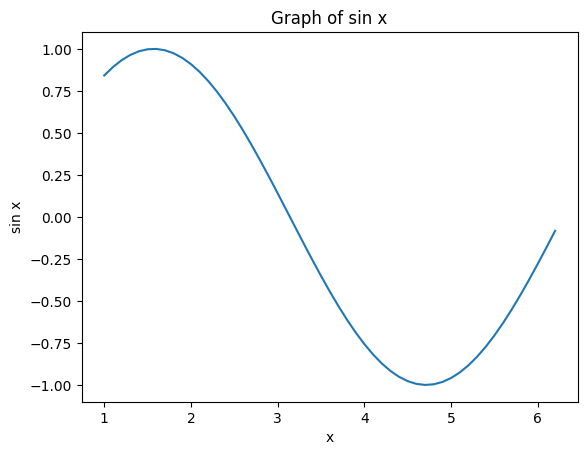

In [92]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('sin x')
plt.title('Graph of sin x')

In [102]:
x = np.linspace(-1, 1, 100)
x

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [103]:
y = x**2

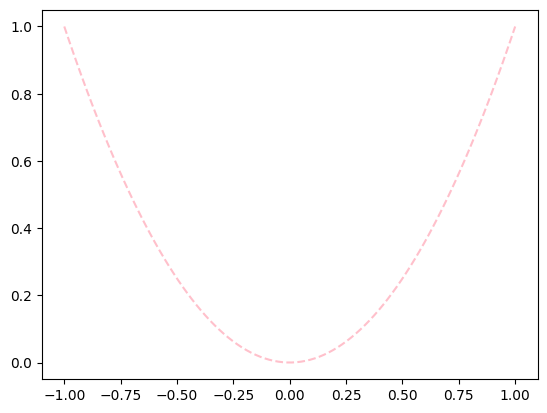

In [105]:
plt.plot(x,y, color='pink', linestyle='dashed')

(0.0, 2.0)

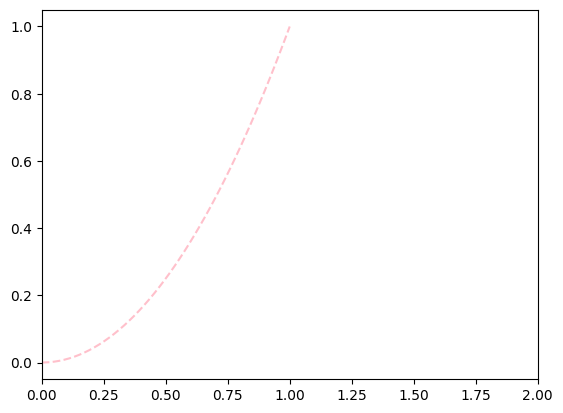

In [106]:
plt.plot(x,y, color='pink', linestyle='dashed')
plt.xlim(0,2)

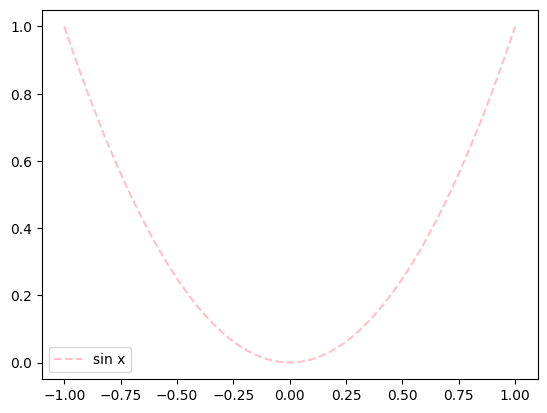

In [107]:
plt.plot(x,y, color='pink', linestyle='dashed', label='sin x')
plt.legend()

In [108]:
! pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


  DEPRECATION: sklearn is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# iris dataset